C:\Users\Admin\AppData\Local\Temp\ipykernel_3028\2718853872.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')


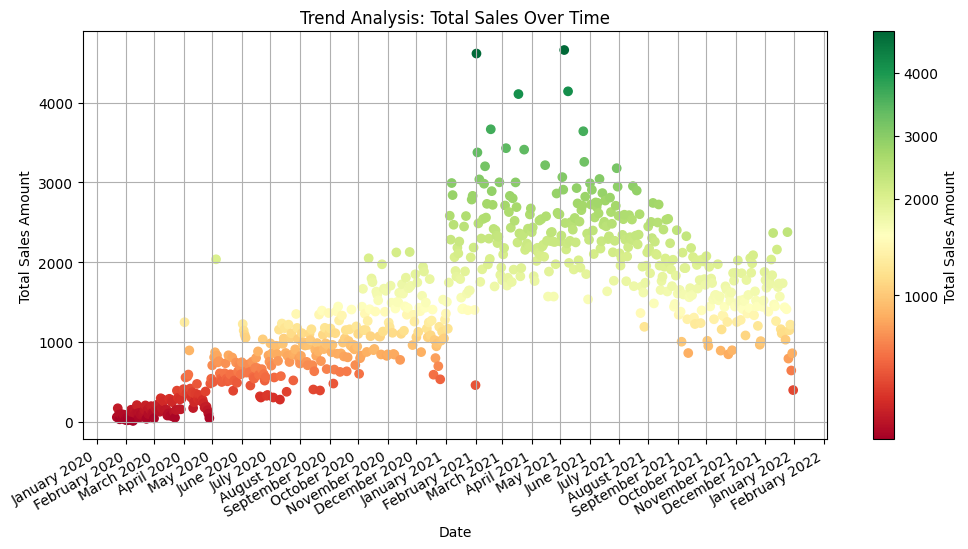

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.colors import TwoSlopeNorm
import matplotlib.cm as cm


df = pd.read_csv(r"C:\Users\Admin\Documents\Data Intelligence Engineer project\Task Files\cleaned-dataset.csv")
df['Order Timestamp'] = pd.to_datetime(df['Order Timestamp'])
df['Order Date'] = df['Order Timestamp'].dt.date


daily_sales = df.groupby('Order Date')['Total amount'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12,6))
cmap = cm.get_cmap('RdYlGn')
norm = TwoSlopeNorm(vmin=daily_sales['Total amount'].min(), vcenter=daily_sales['Total amount'].median(), vmax=daily_sales['Total amount'].max())
sc = ax.scatter(daily_sales['Order Date'], daily_sales['Total amount'], c=daily_sales['Total amount'], cmap=cmap, norm=norm)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))


plt.gcf().autofmt_xdate() # Rotation
plt.title('Trend Analysis: Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
ax.grid(True)
plt.colorbar(sc, label='Total Sales Amount')
plt.show()
